In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Aquire the dataset

In [15]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 52.2MB/s]


In [26]:
# Read dataset into pandas dataframe
df = pd.read_csv('/content/titanic_modified_dataset.csv', index_col ='PassengerId')
df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
PassengerId                                                              
1                 3    0  22.0      1      0   7.2500         0      0   
2                 1    1  38.0      1      0  71.2833         1      1   
3                 3    1  26.0      0      0   7.9250         0      2   
4                 1    1  35.0      1      0  53.10

# 2. Proccess the dataset


In [27]:
# Get X, y
df_np = df.to_numpy().astype(np.float64)
X = df_np[:, :-1]
y = df_np[:, -1]

# Add bias for X
X = np.concatenate(
    (np.ones(len(X)).reshape(-1, 1), X),
    axis=1
)

# Chia train val test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Normalize
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

# 3. Training

Functions

In [28]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(X, theta): # aka compute y_hat
  return sigmoid(np.dot(X, theta))

def compute_loss(y_hat, y): # This work for batch too, we just assume y is vector
  y_hat = np.clip(y_hat, 1e-7, 1- 1e-7) # Clip to avoid log zero
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, y_hat - y)/y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()
  return acc


# Create hyper parameter
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

Start training

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    # loss
    loss = compute_loss(y_hat, y_i)

    # gradient
    gradient = compute_gradient(X_i, y_i, y_hat)

    # theta update
    theta = update_theta(theta, gradient, lr)

    # update log for train
    train_batch_losses.append(loss)
    acc = compute_accuracy(X_i, y_i, theta)
    train_batch_accs.append(acc)

    # update log for val
    y_hat_val = predict(X_val, theta)
    val_loss = compute_loss(y_hat_val, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

  epoch_loss = sum(train_batch_losses) / len(train_batch_losses)
  epoch_acc = sum(train_batch_accs) / len(train_batch_accs)

  epoch_val_loss = sum(val_batch_losses) / len(val_batch_losses)
  epoch_val_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(epoch_loss)
  train_accs.append(epoch_acc)
  val_losses.append(epoch_val_loss)
  val_accs.append(epoch_val_acc)

  print (f'\nEPOCH {epoch + 1}:\tTraining loss : {epoch_loss:.3f}\tValidation loss : {epoch_val_loss:.3f}')

# 4. Result

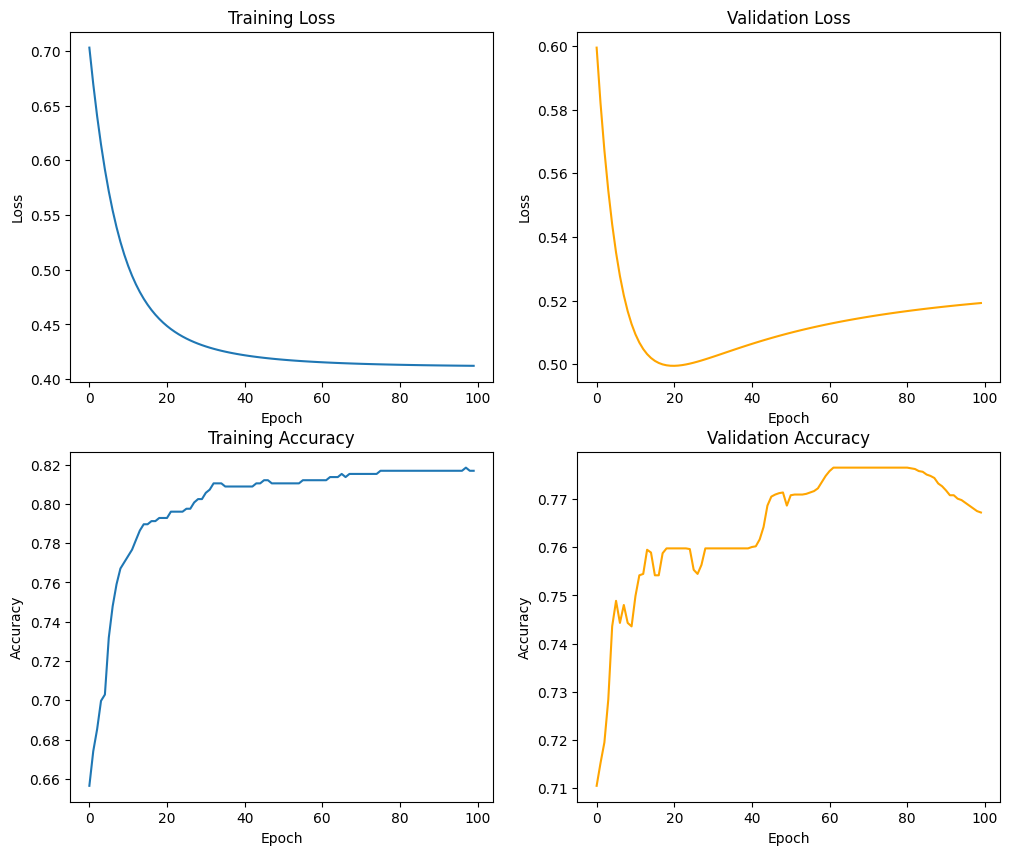

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


In [31]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045
